In [1]:
#libraries
import torch
import torchvision as tv
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torch import optim
from tqdm import tqdm

C:\Users\bbrad\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\bbrad\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# Get device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#data
batch_size = 64

#normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#train
cifar10_train_dataset = tv.datasets.CIFAR10(root='./', # here
                               train=True, # train split
                               download=True, # we want to get the data
                               transform=transform, # put it into tensor format
                        )
train_data = torch.utils.data.DataLoader(cifar10_train_dataset,
                        batch_size=batch_size,
                        )

#test
cifar10_test_dataset = tv.datasets.CIFAR10(root='./', # here
                               train=False, # test split
                               download=True, # we want to get the data
                               transform=transform, # put it into tensor format
                        )
test_data = torch.utils.data.DataLoader(cifar10_test_dataset,
                        batch_size=batch_size,
                        )

# Model Params
learning_rate=5e-1
nepochs = 10
ninputs=3*32*32
nclasses=10

Files already downloaded and verified
Files already downloaded and verified


## PART 1

Bare Minimum Linear Classifier (fancy regression)

In [3]:
class BasicLinear(nn.Module):
    def __init__(self,
                 ninputs=3*32*32,
                 nclasses=10
                ):
        super().__init__()
        self.linear = nn.Linear(ninputs, nclasses)
        
    def forward(self, x):
        x = x.reshape(-1, 3072)
        x = self.linear(x)
        return x

Epoch:  10%|█         | 1/10 [00:08<01:13,  8.15s/epoch]

Epoch 0: loss: 13.388957023620605


Epoch:  20%|██        | 2/10 [00:15<01:03,  7.91s/epoch]

Epoch 1: loss: 11.888395309448242


Epoch:  30%|███       | 3/10 [00:23<00:54,  7.77s/epoch]

Epoch 2: loss: 12.603249549865723


Epoch:  40%|████      | 4/10 [00:31<00:46,  7.70s/epoch]

Epoch 3: loss: 10.096004486083984


Epoch:  50%|█████     | 5/10 [00:38<00:38,  7.67s/epoch]

Epoch 4: loss: 9.306446075439453


Epoch:  60%|██████    | 6/10 [00:46<00:30,  7.67s/epoch]

Epoch 5: loss: 8.9638671875


Epoch:  70%|███████   | 7/10 [00:54<00:22,  7.66s/epoch]

Epoch 6: loss: 8.654451370239258


Epoch:  80%|████████  | 8/10 [01:01<00:15,  7.65s/epoch]

Epoch 7: loss: 8.60062026977539


Epoch:  90%|█████████ | 9/10 [01:09<00:07,  7.67s/epoch]

Epoch 8: loss: 9.041854858398438


Epoch: 100%|██████████| 10/10 [01:16<00:00,  7.70s/epoch]

Epoch 9: loss: 9.270634651184082


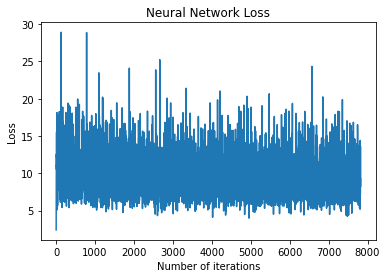

Total accuracy = 22.01%


In [4]:
model = BasicLinear(ninputs=ninputs,
                  nclasses=nclasses).to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

Same classifier w/o bias

In [5]:
class BasicLinearNB(nn.Module):
    def __init__(self,
                 ninputs=3*32*32,
                 nclasses=10
                ):
        super().__init__()
        self.linear = nn.Linear(ninputs, nclasses, bias=False)
        
    def forward(self, x):
        x = x.reshape(-1, 3072)
        x = self.linear(x)
        return x

Epoch:  10%|█         | 1/10 [00:07<01:10,  7.85s/epoch]

Epoch 0: loss: 12.208924293518066


Epoch:  20%|██        | 2/10 [00:15<01:01,  7.73s/epoch]

Epoch 1: loss: 14.83310317993164


Epoch:  30%|███       | 3/10 [00:23<00:53,  7.70s/epoch]

Epoch 2: loss: 13.2717924118042


Epoch:  40%|████      | 4/10 [00:30<00:45,  7.65s/epoch]

Epoch 3: loss: 9.833274841308594


Epoch:  50%|█████     | 5/10 [00:38<00:38,  7.61s/epoch]

Epoch 4: loss: 9.837198257446289


Epoch:  60%|██████    | 6/10 [00:45<00:30,  7.65s/epoch]

Epoch 5: loss: 10.209151268005371


Epoch:  70%|███████   | 7/10 [00:53<00:23,  7.71s/epoch]

Epoch 6: loss: 11.224055290222168


Epoch:  80%|████████  | 8/10 [01:01<00:15,  7.72s/epoch]

Epoch 7: loss: 16.025541305541992


Epoch:  90%|█████████ | 9/10 [01:09<00:07,  7.69s/epoch]

Epoch 8: loss: 9.793779373168945


Epoch: 100%|██████████| 10/10 [01:16<00:00,  7.69s/epoch]

Epoch 9: loss: 15.576530456542969


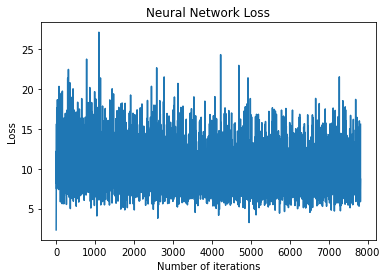

Total accuracy = 15.93%


In [6]:
model = BasicLinearNB(ninputs=ninputs,
                  nclasses=nclasses).to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

w/ Sigmoid

In [7]:
class SigLinear(nn.Module):
    def __init__(self,
                 ninputs=3*32*32,
                 nclasses=10
                ):
        super().__init__()
        self.linear = nn.Linear(ninputs, nclasses)
        
    def forward(self, x):
        x = x.reshape(-1, 3072)
        x = torch.sigmoid(self.linear(x))
        return x

Epoch:  10%|█         | 1/10 [00:07<01:09,  7.69s/epoch]

Epoch 0: loss: 2.216184377670288


Epoch:  20%|██        | 2/10 [00:15<01:02,  7.75s/epoch]

Epoch 1: loss: 2.173367738723755


Epoch:  30%|███       | 3/10 [00:23<00:54,  7.72s/epoch]

Epoch 2: loss: 2.138740301132202


Epoch:  40%|████      | 4/10 [00:31<00:46,  7.80s/epoch]

Epoch 3: loss: 2.114168643951416


Epoch:  50%|█████     | 5/10 [00:38<00:39,  7.83s/epoch]

Epoch 4: loss: 2.0915751457214355


Epoch:  60%|██████    | 6/10 [00:46<00:31,  7.86s/epoch]

Epoch 5: loss: 2.071384906768799


Epoch:  70%|███████   | 7/10 [00:54<00:23,  7.85s/epoch]

Epoch 6: loss: 2.054593086242676


Epoch:  80%|████████  | 8/10 [01:02<00:15,  7.90s/epoch]

Epoch 7: loss: 2.0407614707946777


Epoch:  90%|█████████ | 9/10 [01:10<00:07,  7.86s/epoch]

Epoch 8: loss: 2.029750347137451


Epoch: 100%|██████████| 10/10 [01:18<00:00,  7.84s/epoch]

Epoch 9: loss: 2.020937919616699


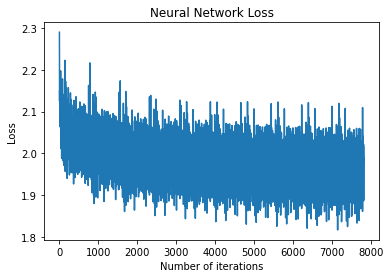

Total accuracy = 38.18%


In [8]:
model = SigLinear(ninputs=ninputs,
                  nclasses=nclasses).to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

w/ softmax

In [9]:
class SoftLinear(nn.Module):
    def __init__(self,
                 ninputs=3*32*32,
                 nclasses=10
                ):
        super().__init__()
        self.linear = nn.Linear(ninputs, nclasses)
        
    def forward(self, x):
        x = x.reshape(-1, 3072)
        x = nn.functional.softmax(self.linear(x), dim=1)
        return x

Epoch:  10%|█         | 1/10 [00:07<01:10,  7.80s/epoch]

Epoch 0: loss: 2.2552285194396973


Epoch:  20%|██        | 2/10 [00:15<01:02,  7.84s/epoch]

Epoch 1: loss: 2.2395005226135254


Epoch:  30%|███       | 3/10 [00:23<00:55,  7.93s/epoch]

Epoch 2: loss: 2.1846730709075928


Epoch:  40%|████      | 4/10 [00:32<00:48,  8.15s/epoch]

Epoch 3: loss: 2.137939214706421


Epoch:  50%|█████     | 5/10 [00:40<00:41,  8.30s/epoch]

Epoch 4: loss: 2.113257646560669


Epoch:  60%|██████    | 6/10 [00:49<00:33,  8.32s/epoch]

Epoch 5: loss: 2.091003656387329


Epoch:  70%|███████   | 7/10 [00:57<00:25,  8.39s/epoch]

Epoch 6: loss: 2.096407651901245


Epoch:  80%|████████  | 8/10 [01:05<00:16,  8.33s/epoch]

Epoch 7: loss: 2.0877225399017334


Epoch:  90%|█████████ | 9/10 [01:14<00:08,  8.36s/epoch]

Epoch 8: loss: 2.0909342765808105


Epoch: 100%|██████████| 10/10 [01:22<00:00,  8.26s/epoch]

Epoch 9: loss: 2.088615894317627


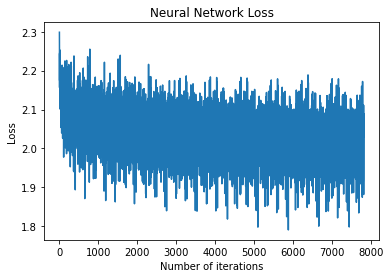

Total accuracy = 41.22%


In [10]:
model = SoftLinear(ninputs=ninputs,
                  nclasses=nclasses).to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

multiple layers

In [11]:
class MultiLinear(nn.Module):
    def __init__(self,
                 ninputs=3*32*32,
                 nhidden=512,
                 nclasses=10
                ):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(ninputs, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nclasses),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = x.reshape(-1, 3072) 
        x = self.net(x)
        return x

Epoch:  10%|█         | 1/10 [00:13<02:03, 13.77s/epoch]

Epoch 0: loss: 2.365168333053589


Epoch:  20%|██        | 2/10 [00:27<01:50, 13.78s/epoch]

Epoch 1: loss: 1.7183151245117188


Epoch:  30%|███       | 3/10 [00:41<01:35, 13.70s/epoch]

Epoch 2: loss: 1.7914396524429321


Epoch:  40%|████      | 4/10 [00:54<01:22, 13.71s/epoch]

Epoch 3: loss: 1.2587727308273315


Epoch:  50%|█████     | 5/10 [01:08<01:08, 13.67s/epoch]

Epoch 4: loss: 1.1843723058700562


Epoch:  60%|██████    | 6/10 [01:22<00:54, 13.63s/epoch]

Epoch 5: loss: 1.3243401050567627


Epoch:  70%|███████   | 7/10 [01:35<00:40, 13.67s/epoch]

Epoch 6: loss: 1.0288301706314087


Epoch:  80%|████████  | 8/10 [01:49<00:27, 13.67s/epoch]

Epoch 7: loss: 0.9995895028114319


Epoch:  90%|█████████ | 9/10 [02:03<00:13, 13.69s/epoch]

Epoch 8: loss: 1.3606983423233032


Epoch: 100%|██████████| 10/10 [02:17<00:00, 13.71s/epoch]

Epoch 9: loss: 0.8492298722267151


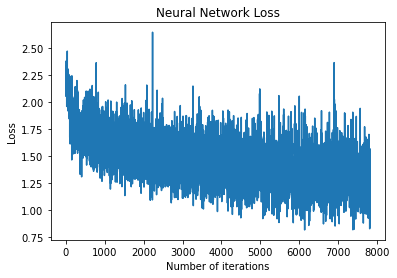

Total accuracy = 45.07%


In [12]:
model = MultiLinear(ninputs=ninputs,
                  nclasses=nclasses).to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

## PART 2

LeNet

In [13]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5),stride=(1,1),padding=(0,0))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5),stride=(1,1),padding=(0,0))
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5),stride=(1,1),padding=(0,0))
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x)) 
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

Epoch:  10%|█         | 1/10 [00:14<02:14, 14.95s/epoch]

Epoch 0: loss: 2.3073537349700928


Epoch:  20%|██        | 2/10 [00:29<01:59, 14.94s/epoch]

Epoch 1: loss: 2.2226085662841797


Epoch:  30%|███       | 3/10 [00:44<01:44, 14.93s/epoch]

Epoch 2: loss: 1.881327509880066


Epoch:  40%|████      | 4/10 [00:59<01:29, 14.94s/epoch]

Epoch 3: loss: 1.5528448820114136


Epoch:  50%|█████     | 5/10 [01:14<01:14, 14.92s/epoch]

Epoch 4: loss: 1.440255045890808


Epoch:  60%|██████    | 6/10 [01:29<00:59, 14.89s/epoch]

Epoch 5: loss: 1.2737656831741333


Epoch:  70%|███████   | 7/10 [01:44<00:44, 14.88s/epoch]

Epoch 6: loss: 1.4368550777435303


Epoch:  80%|████████  | 8/10 [01:59<00:29, 14.92s/epoch]

Epoch 7: loss: 1.1601015329360962


Epoch:  90%|█████████ | 9/10 [02:14<00:14, 14.91s/epoch]

Epoch 8: loss: 0.9956233501434326


Epoch: 100%|██████████| 10/10 [02:29<00:00, 14.91s/epoch]

Epoch 9: loss: 1.271314263343811


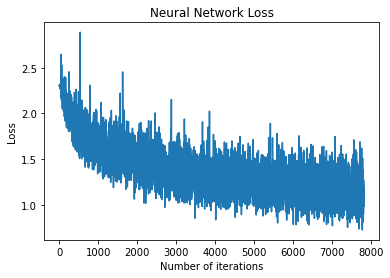

Total accuracy = 50.52%


In [14]:
model = LeNet()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

Scratch CNN AKA 'ScratchNet'

In [15]:
class ScratchNet(nn.Module):
    def __init__(self,
                ninputs = 3*32*32,
                nclasses = 10
                ):
        super(ScratchNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=4, stride=2, padding=0)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=2, padding=0)
        self.fc1 = nn.Linear(16, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x

Epoch:  10%|█         | 1/10 [00:09<01:29,  9.99s/epoch]

Epoch 0: loss: 2.0178637504577637


Epoch:  20%|██        | 2/10 [00:19<01:19,  9.88s/epoch]

Epoch 1: loss: 1.7712851762771606


Epoch:  30%|███       | 3/10 [00:29<01:08,  9.83s/epoch]

Epoch 2: loss: 1.8774710893630981


Epoch:  40%|████      | 4/10 [00:39<00:59,  9.84s/epoch]

Epoch 3: loss: 2.035403251647949


Epoch:  50%|█████     | 5/10 [00:49<00:49,  9.81s/epoch]

Epoch 4: loss: 1.955396056175232


Epoch:  60%|██████    | 6/10 [00:58<00:39,  9.82s/epoch]

Epoch 5: loss: 2.0283443927764893


Epoch:  70%|███████   | 7/10 [01:08<00:29,  9.85s/epoch]

Epoch 6: loss: 1.875597357749939


Epoch:  80%|████████  | 8/10 [01:18<00:19,  9.82s/epoch]

Epoch 7: loss: 1.7590831518173218


Epoch:  90%|█████████ | 9/10 [01:28<00:09,  9.87s/epoch]

Epoch 8: loss: 1.8815215826034546


Epoch: 100%|██████████| 10/10 [01:38<00:00,  9.85s/epoch]

Epoch 9: loss: 1.6890063285827637


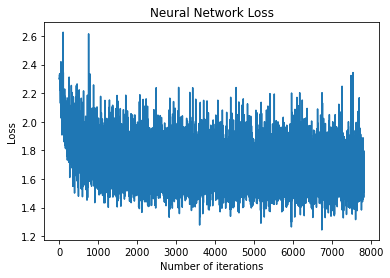

Total accuracy = 35.59%


In [16]:
model = ScratchNet(ninputs=ninputs,
                  nclasses=nclasses)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# Training
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

ScratchNet with initializations and multiplicative LR scheduler.
Originally, I tried to use the 'ReduceLROnPLateau' scheduler but my 'ScratchNet' loss never seems to settle down enough for the scheduler to detect a plateau.

In [17]:
class ScratchNet_wInit(nn.Module):
    def __init__(self,
                ninputs = 3*32*32,
                nclasses = 10
                ):
        super(ScratchNet_wInit, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=4, stride=2, padding=0)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=2, padding=0)
        self.fc1 = nn.Linear(16, 10)
        
        self.initialize_weights()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_uniform_(m.weight)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)


Adjusting learning rate of group 0 to 5.0000e-01.


Epoch:  10%|█         | 1/10 [00:09<01:26,  9.57s/epoch]

Adjusting learning rate of group 0 to 4.7500e-01.
Epoch 0: loss: 2.533128499984741


Epoch:  20%|██        | 2/10 [00:19<01:17,  9.69s/epoch]

Adjusting learning rate of group 0 to 4.5125e-01.
Epoch 1: loss: 2.0430731773376465


Epoch:  30%|███       | 3/10 [00:28<01:07,  9.60s/epoch]

Adjusting learning rate of group 0 to 4.2869e-01.
Epoch 2: loss: 2.0583887100219727


Epoch:  40%|████      | 4/10 [00:38<00:57,  9.64s/epoch]

Adjusting learning rate of group 0 to 4.0725e-01.
Epoch 3: loss: 2.1107139587402344


Epoch:  50%|█████     | 5/10 [00:48<00:48,  9.66s/epoch]

Adjusting learning rate of group 0 to 3.8689e-01.
Epoch 4: loss: 2.075162410736084


Epoch:  60%|██████    | 6/10 [00:57<00:38,  9.66s/epoch]

Adjusting learning rate of group 0 to 3.6755e-01.
Epoch 5: loss: 2.0634570121765137


Epoch:  70%|███████   | 7/10 [01:07<00:28,  9.64s/epoch]

Adjusting learning rate of group 0 to 3.4917e-01.
Epoch 6: loss: 2.0292534828186035


Epoch:  80%|████████  | 8/10 [01:17<00:19,  9.62s/epoch]

Adjusting learning rate of group 0 to 3.3171e-01.
Epoch 7: loss: 2.007542133331299


Epoch:  90%|█████████ | 9/10 [01:26<00:09,  9.62s/epoch]

Adjusting learning rate of group 0 to 3.1512e-01.
Epoch 8: loss: 2.241459846496582


Epoch: 100%|██████████| 10/10 [01:36<00:00,  9.63s/epoch]

Adjusting learning rate of group 0 to 2.9937e-01.
Epoch 9: loss: 2.133254051208496


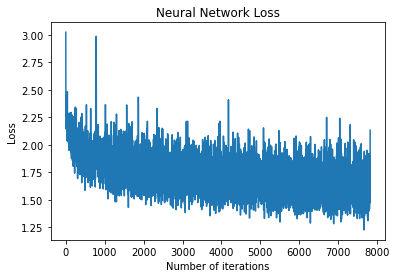

Total accuracy = 32.30%


In [18]:
model = ScratchNet_wInit(ninputs=ninputs,
                  nclasses=nclasses)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

# scheduler
lmbda = lambda epoch: 0.95
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda, verbose = True)

model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    scheduler.step()
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")

## PART 3

In [19]:
#ResNet50
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

Using cache found in C:\Users\bbrad/.cache\torch\hub\pytorch_vision_v0.10.0


We want to drop the average pooling layer, and change the number of out_features to 10.
Then, we want to freeze the weights for all layers except the final FC layer so we can fine tune the model.

In [20]:
#'do-nothing' class to drop any unwanted layers
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x
    
#freeze weights
for param in model.parameters():
    param.requires_grad = False
    
#drop pooling layer
model.avgpool = Identity()
#change FC layer to have 10 out features
model.fc = nn.Linear(2048, 10)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Epoch:  10%|█         | 1/10 [02:29<22:23, 149.29s/epoch]

Epoch 0: loss: 18.109601974487305


Epoch:  20%|██        | 2/10 [04:59<19:59, 150.00s/epoch]

Epoch 1: loss: 25.02505874633789


Epoch:  30%|███       | 3/10 [07:33<17:41, 151.64s/epoch]

Epoch 2: loss: 26.697248458862305


Epoch:  40%|████      | 4/10 [10:05<15:09, 151.65s/epoch]

Epoch 3: loss: 4.647000789642334


Epoch:  50%|█████     | 5/10 [12:37<12:40, 152.01s/epoch]

Epoch 4: loss: 9.63059139251709


Epoch:  60%|██████    | 6/10 [15:10<10:08, 152.15s/epoch]

Epoch 5: loss: 17.81202507019043


Epoch:  70%|███████   | 7/10 [17:42<07:36, 152.21s/epoch]

Epoch 6: loss: 12.736454963684082


Epoch:  80%|████████  | 8/10 [20:14<05:04, 152.15s/epoch]

Epoch 7: loss: 9.326417922973633


Epoch:  90%|█████████ | 9/10 [22:47<02:32, 152.34s/epoch]

Epoch 8: loss: 11.79086971282959


Epoch: 100%|██████████| 10/10 [25:20<00:00, 152.01s/epoch]

Epoch 9: loss: 9.339518547058105


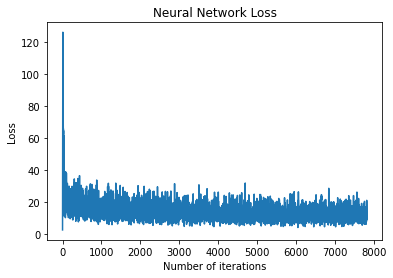

Total accuracy = 32.16%


In [21]:
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loss function
LossFunction = torch.nn.CrossEntropyLoss()

model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Show loss history
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

#Testing
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(cifar10_test_dataset)*100:.2f}%")